In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#3d visualization
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv')
df = df.iloc[:141,:11]
df

,Name,Musician_years of instruction ( >= 5 -> 2 ),AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg
0,pilot 1,1.0,0.90,0.81,0.71,0.81,0.76,0.57,0.81,0.71,0.57
1,pilot 2,2.0,0.86,0.90,0.52,0.86,0.57,0.57,0.86,0.67,0.62
2,pilot 3,1.0,0.81,0.38,0.29,0.57,0.38,0.33,0.62,0.33,0.29
3,main 1,1.0,0.76,0.52,0.52,0.52,0.57,0.38,0.71,0.62,0.52
4,main 2,1.0,0.95,0.90,0.95,0.86,1.00,0.62,0.81,0.90,0.86
...,...,...,...,...,...,...,...,...,...,...,...
136,main 138,2.0,0.90,0.76,0.90,0.71,0.52,0.43,0.76,0.57,0.81
137,main 139,2.0,0.86,0.76,1.00,0.81,0.76,0.71,0.76,0.57,0.71
138,main 140,2.0,0.86,0.48,0.43,0.76,0.57,0.38,0.71,0.29,0.33
139,main 141,2.0,0.95,0.62,1.00,0.76,0.71,0.57,0.76,0.71,0.57


In [13]:
df=df[['AudSD', 'AudIrreg', 'AudReg', 'VisSD', 'VisIrreg', 'VisReg', 'TactSD', 'TactIrreg', 'TactReg', 'Musician_years of instruction ( >= 5 -> 2 )']]
df.rename(columns={'Musician_years of instruction ( >= 5 -> 2 )':'Musical_training'},inplace=True)
print(df['Musical_training'].value_counts())
df.head()

Musical_training
2.0    77
1.0    64
Name: count, dtype: int64


,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,Musical_training
0,0.90,0.81,0.71,0.81,0.76,0.57,0.81,0.71,0.57,1.0
1,0.86,0.90,0.52,0.86,0.57,0.57,0.86,0.67,0.62,2.0
2,0.81,0.38,0.29,0.57,0.38,0.33,0.62,0.33,0.29,1.0
3,0.76,0.52,0.52,0.52,0.57,0.38,0.71,0.62,0.52,1.0
4,0.95,0.90,0.95,0.86,1.00,0.62,0.81,0.90,0.86,1.0


In [14]:
continuous_mus = pd.read_excel('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/end_of_study_Q.xlsx')
df['years of instruction']=continuous_mus.iloc[:141,5]
df

,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,Musical_training,years of instruction
0,0.90,0.81,0.71,0.81,0.76,0.57,0.81,0.71,0.57,1.0,2
1,0.86,0.90,0.52,0.86,0.57,0.57,0.86,0.67,0.62,2.0,5
2,0.81,0.38,0.29,0.57,0.38,0.33,0.62,0.33,0.29,1.0,0
3,0.76,0.52,0.52,0.52,0.57,0.38,0.71,0.62,0.52,1.0,0
4,0.95,0.90,0.95,0.86,1.00,0.62,0.81,0.90,0.86,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
136,0.90,0.76,0.90,0.71,0.52,0.43,0.76,0.57,0.81,2.0,16
137,0.86,0.76,1.00,0.81,0.76,0.71,0.76,0.57,0.71,2.0,21
138,0.86,0.48,0.43,0.76,0.57,0.38,0.71,0.29,0.33,2.0,9
139,0.95,0.62,1.00,0.76,0.71,0.57,0.76,0.71,0.57,2.0,17


In [15]:
cols_to_change=['AudSD', 'AudIrreg', 'VisSD', 'VisIrreg', 'VisReg', 'TactIrreg', 'TactReg','Musical_training']
for col in cols_to_change:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AudSD                 141 non-null    float64
 1   AudIrreg              141 non-null    float64
 2   AudReg                141 non-null    float64
 3   VisSD                 141 non-null    float64
 4   VisIrreg              141 non-null    float64
 5   VisReg                141 non-null    float64
 6   TactSD                141 non-null    float64
 7   TactIrreg             141 non-null    float64
 8   TactReg               141 non-null    float64
 9   Musical_training      141 non-null    float64
 10  years of instruction  141 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 12.2 KB


In [17]:
df_a = df.iloc[:,[0,1,2]]
df_a.columns = ['single interval','non-beat sequence','beat sequence']
df_v = df.iloc[:,[3,4,5]]
df_v.columns = ['single interval','non-beat sequence','beat sequence']
df_t = df.iloc[:,[6,7,8]]
df_t.columns = ['single interval','non-beat sequence','beat sequence']

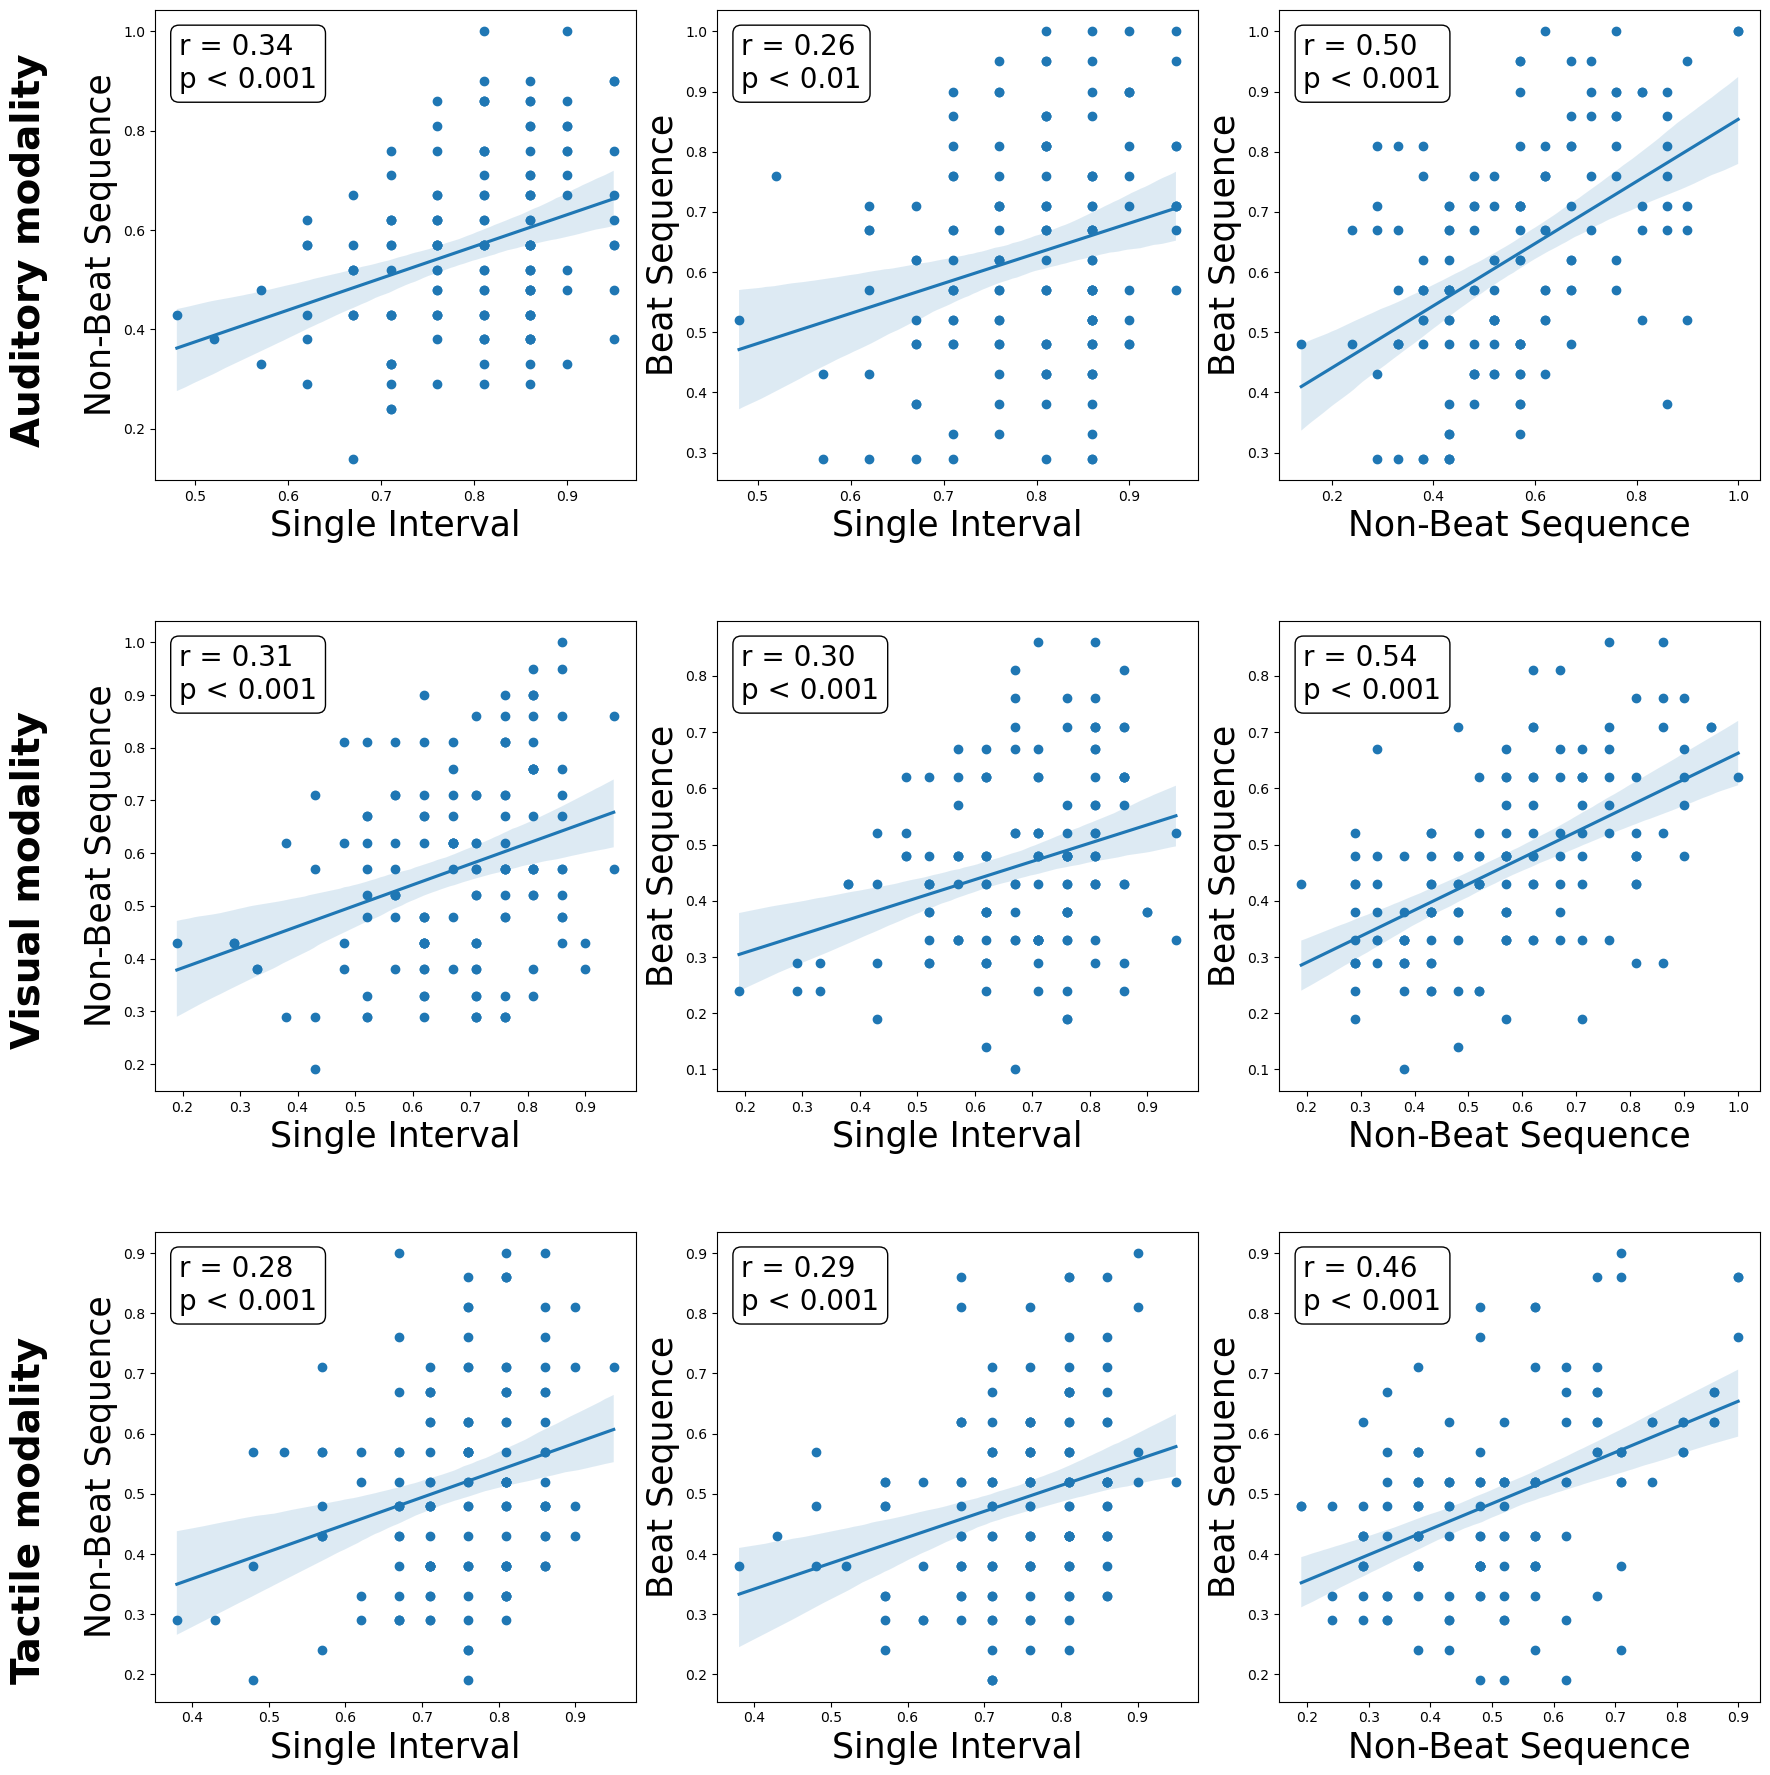

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assume df_v and df_a are your DataFrames
col1_v, col2_v, col3_v = df_v.columns[:3]  # Extract column names for df_v
col1_a, col2_a, col3_a = df_a.columns[:3]  # Extract column names for df_a
col1_t, col2_t, col3_t = df_t.columns[:3]
# Set up the figure for a 2x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(18, 18), facecolor='white')


# Define pairs to plot for df_a
pairs_a = [(col1_a, col2_a), (col1_a, col3_a), (col2_a, col3_a)]
for i, (x_col, y_col) in enumerate(pairs_a):
    ax = axes[0, i]  # Bottom row
    sns.regplot(data=df_a, x=x_col, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(df_a[x_col], df_a[y_col])
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction',
                ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    ax.set_xlabel(x_col.replace('_', ' ').title(), fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')
    
# Define pairs to plot for df_v
pairs_v = [(col1_v, col2_v), (col1_v, col3_v), (col2_v, col3_v)]
for i, (x_col, y_col) in enumerate(pairs_v):
    ax = axes[1, i]  # Top row
    sns.regplot(data=df_v, x=x_col, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(df_v[x_col], df_v[y_col])
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction',
                ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    ax.set_xlabel(x_col.replace('_', ' ').title(), fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')
    
# Define pairs to plot for df_t
pairs_t = [(col1_t, col2_t), (col1_t, col3_t), (col2_t, col3_t)]
for i, (x_col, y_col) in enumerate(pairs_t):
    ax = axes[2, i]  # Top row
    sns.regplot(data=df_t, x=x_col, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(df_t[x_col], df_t[y_col])
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction',
                ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    ax.set_xlabel(x_col.replace('_', ' ').title(), fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')

# Add DataFrame labels on the left side of each row
fig.text(0.03, 0.85, 'Auditory modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.50, 'Visual modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.15, 'Tactile modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')

# Set the main title and adjust layout
fig.suptitle('', fontsize=24, y=1.02)
plt.tight_layout()
plt.subplots_adjust(left=0.1, hspace=0.3)  # Adjust space between rows and add left margin for labels

###### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/group analysis.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)  # Use 600 DPI for line drawings

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/task_correlations.png', bbox_inches='tight',dpi=400)

plt.show()


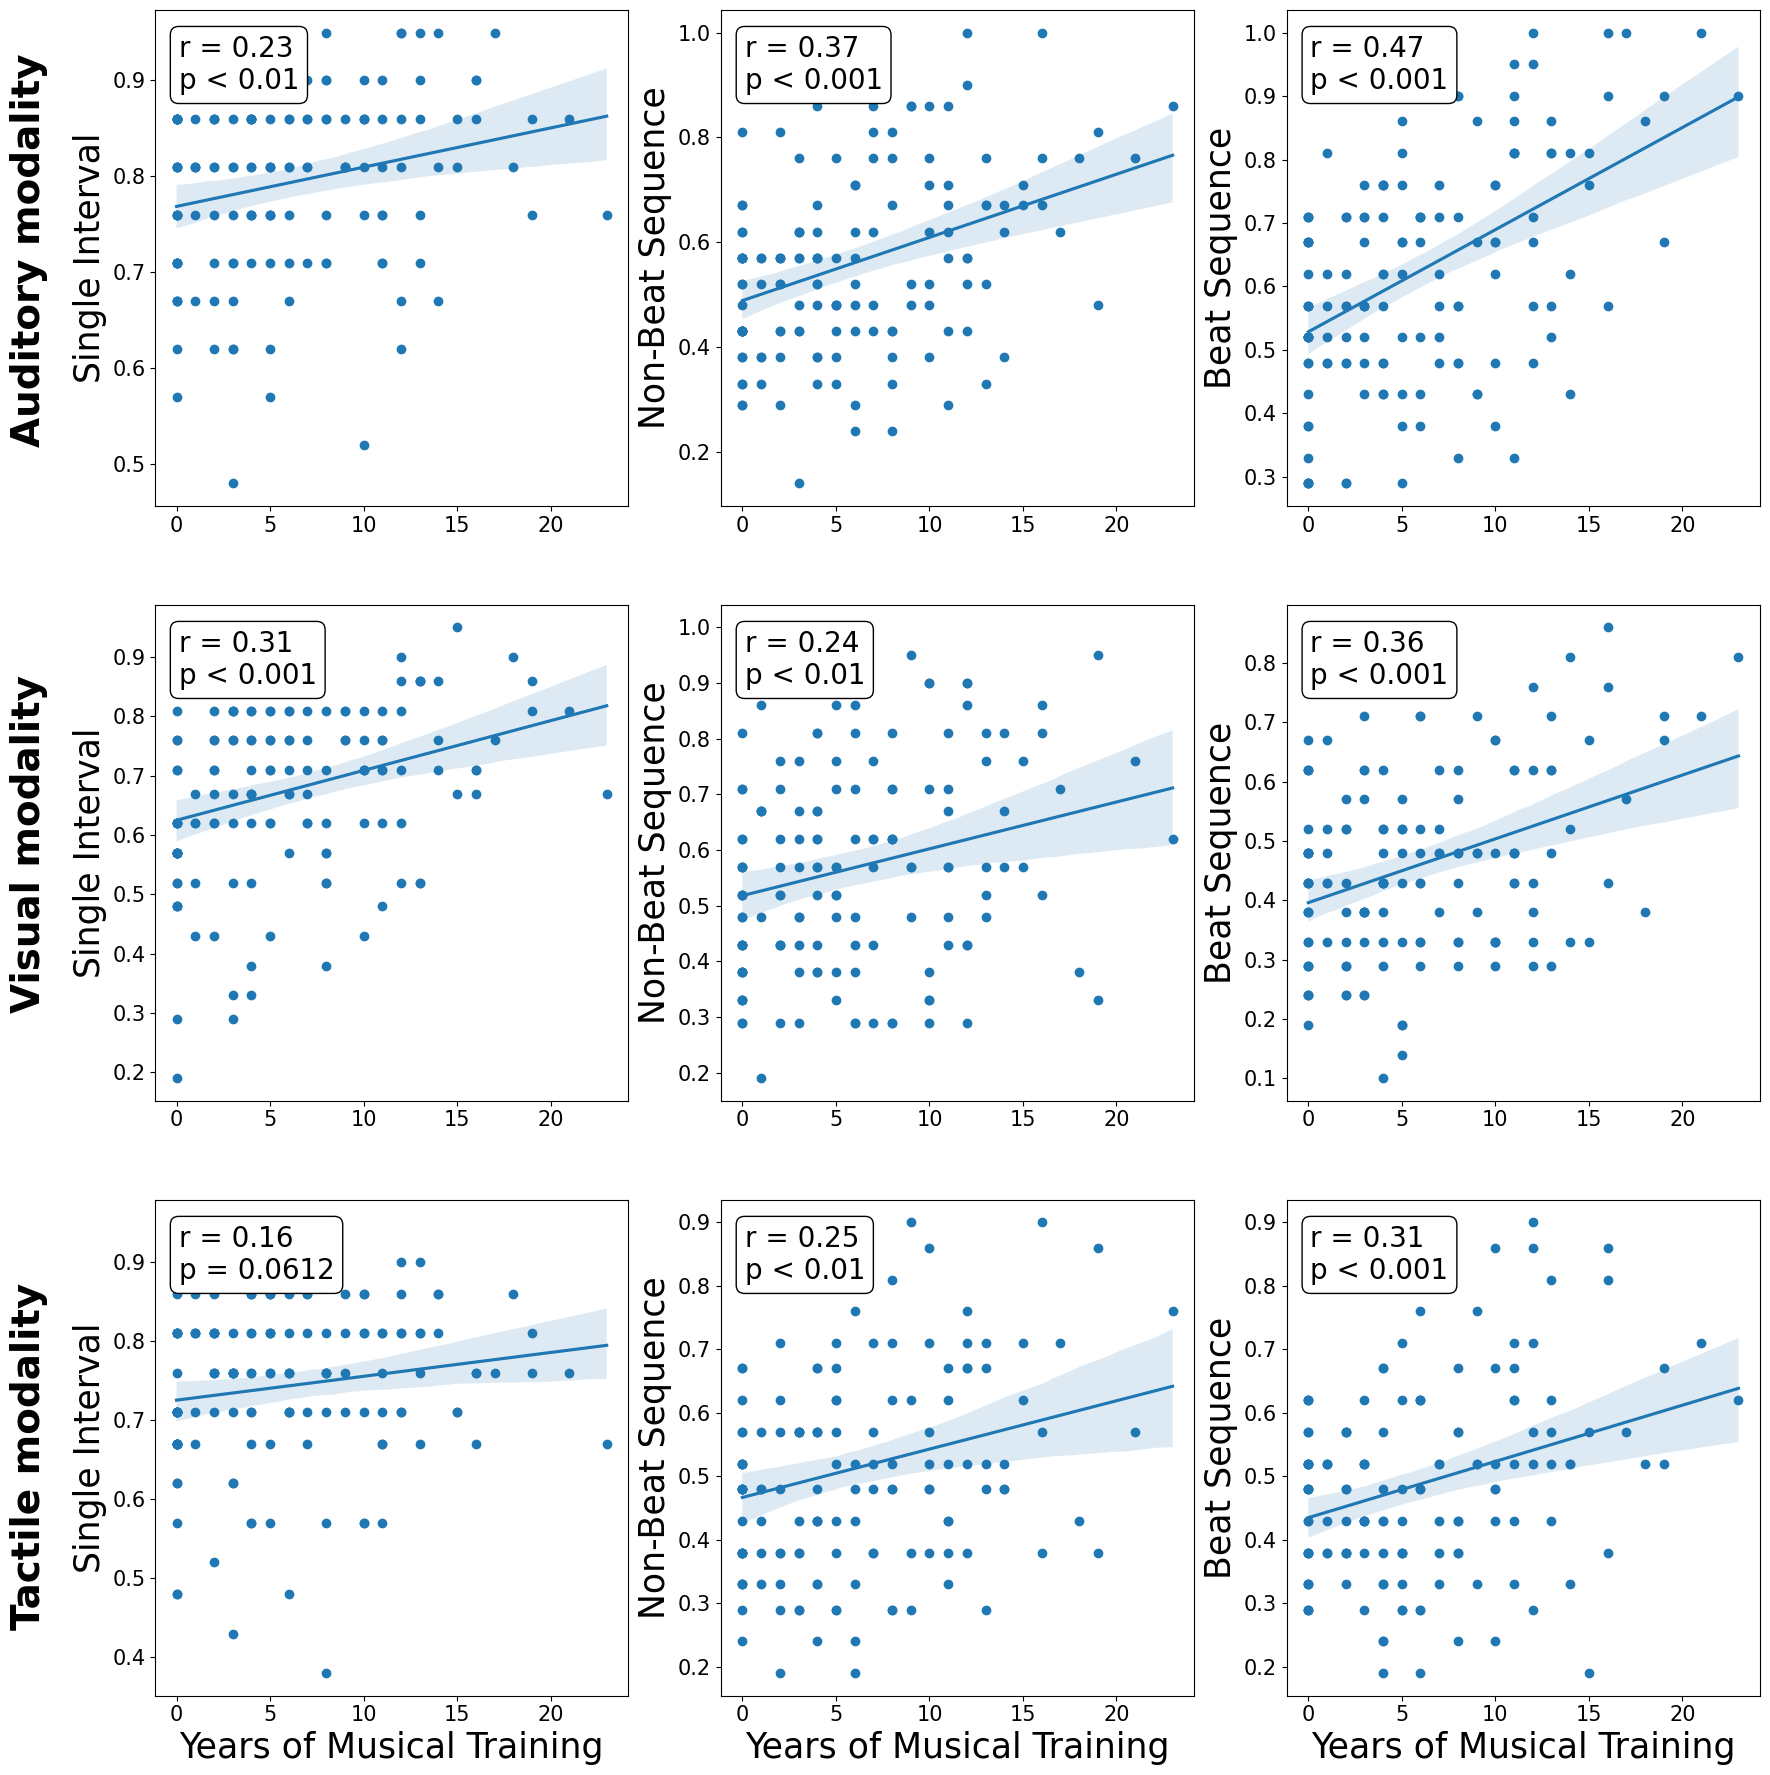

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Extract column names
col1_v, col2_v, col3_v = df_v.columns[:3]  # Visual modality columns
col1_a, col2_a, col3_a = df_a.columns[:3]  # Auditory modality columns
col1_t, col2_t, col3_t = df_t.columns[:3]  # Tactile modality columns

music = df['years of instruction']  # Define music variable

# Set up the figure
fig, axes = plt.subplots(3, 3, figsize=(18, 18), facecolor='white')

# Define pairs for auditory modality
pairs_a = [col1_a, col2_a, col3_a]

# Plot each pair in the auditory modality row
for i, y_col in enumerate(pairs_a):
    ax = axes[0, i]
    sns.regplot(data=df_a, x=music, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(music, df_a[y_col])
    
    # Display p-value text
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    # Set labels and face color
    ax.set_xlabel("", fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')
    ax.tick_params(axis='both', which='major', labelsize=15)

pairs_v = [col1_v, col2_v, col3_v]
# Plot each pair in the visual modality row
for i, y_col in enumerate(pairs_v):
    ax = axes[1, i]
    sns.regplot(data=df_v, x=music, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(music, df_v[y_col])
    
    # Display p-value text
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    # Set labels and face color
    ax.set_xlabel("", fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')
    ax.tick_params(axis='both', which='major', labelsize=15)
    
pairs_t = [col1_t, col2_t, col3_t]
# Plot each pair in the visual modality row
for i, y_col in enumerate(pairs_t):
    ax = axes[2, i]
    sns.regplot(data=df_t, x=music, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(music, df_t[y_col])
    
    # Display p-value text
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    # Set labels and face color
    ax.set_xlabel("Years of Musical Training", fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')
    ax.tick_params(axis='both', which='major', labelsize=15)
    
fig.text(0.03, 0.85, 'Auditory modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.52, 'Visual modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.18, 'Tactile modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')

# Set the main title and adjust layout
fig.suptitle('', fontsize=24, y=1.02)
plt.tight_layout()
plt.subplots_adjust(left=0.1, hspace=0.3)  # Adjust space for better layout
plt.subplots_adjust(hspace=0.2)

###### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/group analysis.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)  # Use 600 DPI for line drawings

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/music_task_correlations.png', bbox_inches='tight',dpi=400)

plt.show()
